# Problem Set 5
#### 1. 


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import scipy.stats as stats

In [24]:
def euler(f, x, h, a, b):
    """
    Function to integrate differential equations using eulers
    method.
    Parameters: 
    f: the function or functions
    a: beginning of inerval,
    b: end of interval,
    h: Size of steps
    x: initial condition
    """
    # Define all the points to evaluate the function at
    tpoints = np.arange(a, b, h)
    
    # Create an array to store the values of x
    xpoints = np.empty((len(tpoints), len(x)))
    for i, t in enumerate(tpoints): # At every t point
        xpoints[i, :] = x # Add it to the list of x values
        x += h*f(x, t) # Evaluate the newest x value
    return tpoints, xpoints

def rk_4thorder(f, x, h, a, b):
    """
    Implementation of fourth order runga kutta as in Newman page 345
    Parameters: 
    f: the function or functions
    a: beginning of inerval,
    b: end of interval,
    h: Size of steps
    x: initial condition
    """
    # define the points where the differential is evaluated
    tpoints = np.arange(a, b, h)
    
    # Create an array to store the calculated values of x inside of
    xpoints = np.empty((len(tpoints), len(x)))
    for i, t in enumerate(tpoints): # for every value of t
        xpoints[i, :] = x # Add the newest measuremnt of the value of x
         
        #Calculate all of the terms of RK 4th order as in pg. 344 Newman
        k1 = h*f(x, t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        k3 = h*f(x+0.5*k2, t+0.5*h)
        k4 = h*f(x+k3, t+h)
        
        x += (k1 + 2*k2 + 2*k3 + k4)/6
    return tpoints, xpoints

def verlet_lf(f, init, h, a, b):
    """
    Solve an ODE using Verlet leapfrog method: 
    
    """
    x = init[0:2]
    v = init[2:]
    tpoints = np.arange(a, b, h)
    
    v_half = v + 0.5*h*f(x, a) # v at t + 0.5h
    
    xpoints = []
    ypoints = []
    vx_points = []
    vy_points = []
    
    for t in tpoints:
        xpoints.append(x[0])
        ypoints.append(x[1])
        vx_points.append(v[0])
        vy_points.append(v[1])
        
        x = x + h*v_half
        k = h*f(x, t + h)
        v = v_half + 0.5*k
        v_half = v_half + k
        
    return xpoints, ypoints, vx_points, vy_points


To begin we first re-write the second order ordinary differential equation as two simultaneous ordinary differential equations of first order as below 
$$
\frac{d^2x}{dt^2} + x = 0 \rightarrow \frac{dx}{dt} = y, \frac{dy}{dt} = -x
$$

then using the initial conditions: $x(0) = 1$ and $x'(0) = 0$

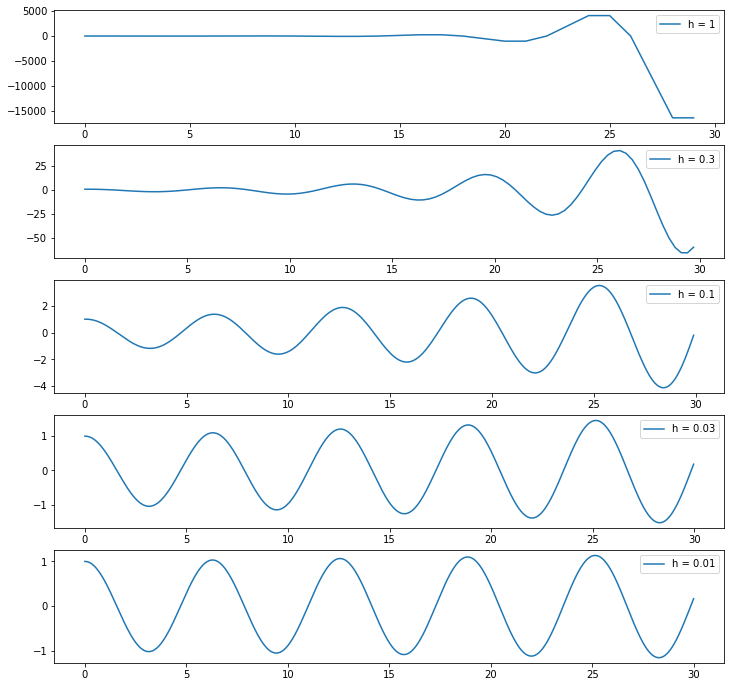

In [44]:
# Define the function for problem 1 using two simultaneous differential equations
def func_1(vals, t):
    """
    Function to evaluate the derivative for problem 1
    parameters: 
    x: the value of x at which the function is evaluated. This corrseponds
    to a vector where the first component is x and the second is first derivative of x
    """
    x = vals[0]
    y = vals[1]
    # compute the derivatives according to the functions above
    dxdt = y
    dydt = -x
    return np.array([dxdt,dydt], float)

# Define all of the constants
x = [1, 0]
h = [1, 0.3, 0.1, 0.03, 0.01]
a = 0
b = 30
fig, ax = plt.subplots(len(h), figsize = (12, 12))
x30e = []
# Evaluate the diff eq using eulers method. 
for i in zip(ax.flatten(), h):
    t, y = euler(func_1, x, i[1], a, b)
    x30e.append(y[-1][0])
    i[0].plot(t, y[:, 0], label = f'h = {i[1]}')
    i[0].legend()

This method performs very poorly for h > 0.01. For values of h > 0.1, the solution is very unstable and creates increasingly large swings for larger t. For decreasing h this effect is diminished however it is still present. Below I use the Runge-Kutta fourth order method to create the same plots. 

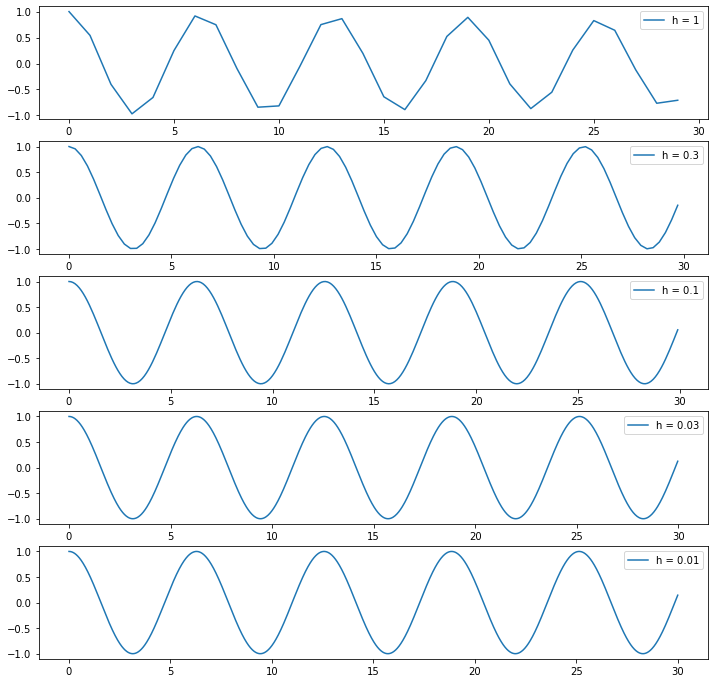

In [45]:
fig, ax = plt.subplots(len(h), figsize = (12, 12))

# Evaluate the diff eq using 4th order runge kutta method. 
x30rk = []

for i in zip(ax.flatten(), h):
    t, y = rk_4thorder(func_1, x, i[1], a, b)
    x30rk.append(y[-1][0])
    i[0].plot(t, y[:, 0], label = f'h = {i[1]}')
    i[0].legend()

Text(0, 0.5, 'log(error)')

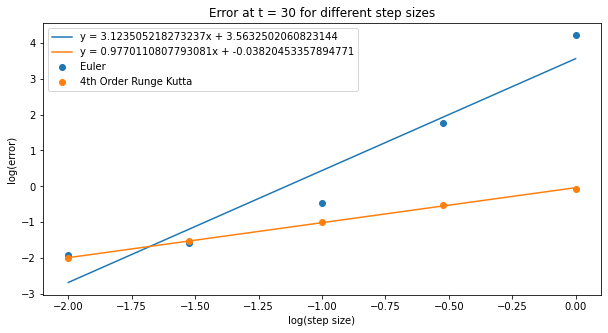

In [46]:
xexact = np.cos(30)
fig, ax = plt.subplots(1,1, figsize = (10, 5))

# To check the convergence, use linregress to find the slope of the lines in log log space

logh = np.log10(h)
log_err_euler = np.log10(abs(x30e - xexact))

# Calculate the linear regression for eulers method
fiteuler = stats.linregress(logh, log_err_euler)
ax.plot(logh, 
        fiteuler.intercept+fiteuler.slope*logh, 
        label = f"y = {fiteuler.slope}x + {fiteuler.intercept}")

log_err_rk = np.log10(abs(x30rk - xexact))
fitrk = stats.linregress(logh, log_err_rk)
ax.plot(logh, 
        fitrk.intercept+fitrk.slope*logh, 
        label = f"y = {fitrk.slope}x + {fitrk.intercept}")

ax.scatter(logh, log_err_euler, label = "Euler")
ax.scatter(logh, log_err_rk, label = "4th Order Runge Kutta")

# ax.plot(logh, slope, label = "Line with slope = 1")

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title("Error at t = 30 for different step sizes")
ax.legend()
ax.set_xlabel('log(step size)')
ax.set_ylabel('log(error)')

We expect that the error of fourth order Runge-Kutta decreases as $h^4$ while the error of eulers method should decrease as $h$. However using the `scipy.linregress` function gives slopes for the change in error in log-log space as ~3 for Euler method and ~1 for 4th order Runge-Kutta. The difference between the actual decrease in the error of the methods here and the decrease stated in Newman can be reconciled by considering many more values of $\delta t$. When this is done, the expeected convergence of the two methods begin to resemble those stated in Newman. 


4th order Runge-Kutta doesn't experience the same oscillations that Eulers method does between t = 0 and t = 30. It looks to be qualitatively correct even for the h = 0.3 case. 

## Problem 3: 
The orbits are given by the differential equations 
$$
\frac{d^2x}{dt^2} = \frac{x}{(1 + x^2 + y^2)^{3/2}}
$$
and
$$
\frac{d^2y}{dt^2} = \frac{y}{(1 + x^2 + y^2)^{3/2}}
$$

which can be split into the four simultaneous differential equations:
$$
\frac{dx}{dt} = k
\\
\frac{dk}{dt} = -\frac{x}{(1 + x^2 + y^2)^{3/2}}
\\
\frac{dy}{dt} = j
\\
\frac{dj}{dt} = - \frac{y}{(1 + x^2 + y^2)^{3/2}}
$$

In [10]:
def orbits(r, t):
    """
    Calculate the position along the orbit of an object given initial positions and velocities
    """
    x = r[0]
    y = r[1]

    dvxdt =  -(x)/(1 + x**2 + y**2)**(3/2)
    dvydt = -(y)/(1 + x**2 + y**2)**(3/2)
    
    return np.array([dvxdt, dvydt])

def orbits2(r, t):
    """
    Function to use 4th order RK and Eulers formula. Differs from the one used for leap frog
    since verlet-leap frog essentialy solves two of the equations in the method. 
    """
    x = r[0]
    y = r[1]
    dxdt = r[2]
    dydt = r[3]

    dvxdt =  -(x)/(1 + x**2 + y**2)**(3/2)
    dvydt = -(y)/(1 + x**2 + y**2)**(3/2)
    
    return np.array([dxdt, dydt, dvxdt, dvydt])


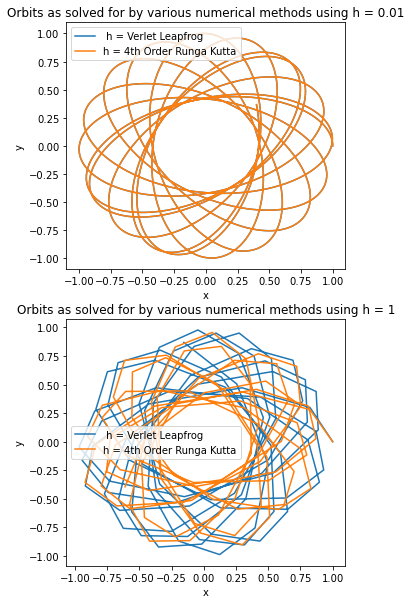

In [83]:
a = 0
b = 100
h = [0.01, 1]
x = [1, 0, 0, 0.3]

fig, ax = plt.subplots(2, 1, figsize = (5, 10))
for p, ash in zip(ax, h):
    data_lf = verlet_lf(orbits, x, ash, a, b)
    t, data_rk = rk_4thorder(orbits2, x, ash, a, b)
    
    p.plot(data_lf[0], data_lf[1], label = f" h = Verlet Leapfrog")
    p.plot(data_rk[:, 0], data_rk[:, 1], label = f"h = 4th Order Runga Kutta")
    p.legend()
    p.set_xlabel("x")
    p.set_ylabel("y")
    p.set_title(f"Orbits as solved for by various numerical methods using h = {ash}")
# ax3.plot(data_euler[:, 0], data_euler[:, 1], label = f"h = {ash}")

Text(0.5, 1.0, 'Eulers Method')

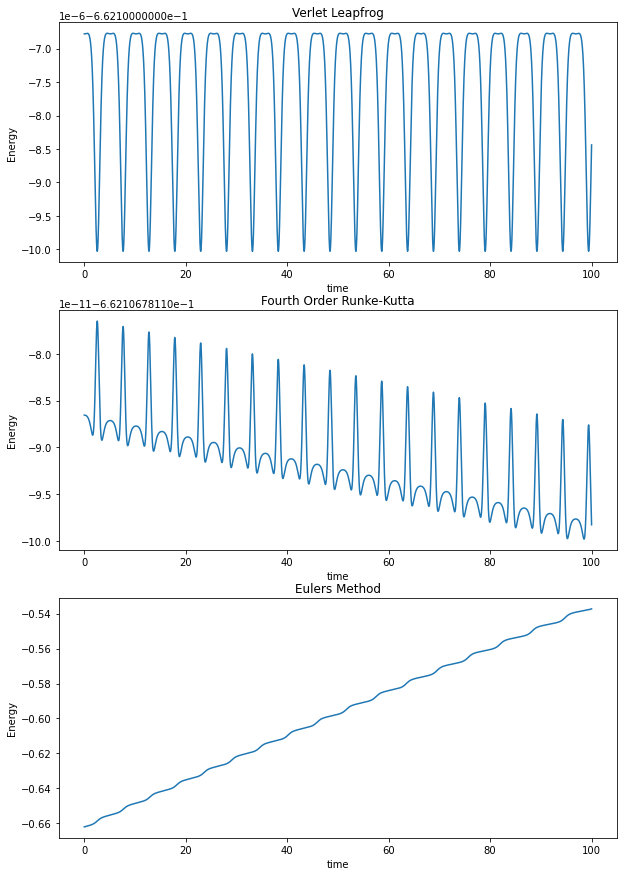

In [91]:
def e(x, y, vx, vy):
    
    f1 = 0.5*(np.array(vx)**2 + np.array(vy)**2)
    f2 = -1/(np.sqrt(1 + np.array(x)**2 + np.array(y)**2))
    return f1 + f2

h = 0.01

data_lf = verlet_lf(orbits, x, h, a, b)
t, data_rk = rk_4thorder(orbits2, x, h, a, b)
t, data_euler = euler(orbits2, x, h, a, b)

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize = (10, 15))

ax1.plot(t, e(*data_lf))
ax2.plot(t, e(*data_rk.T))
ax3.plot(t, e(*data_euler.T))

for j in (ax1, ax2, ax3):
    j.set_xlabel("time")
    j.set_ylabel("Energy")
ax1.set_title("Verlet Leapfrog")
ax2.set_title("Fourth Order Runke-Kutta")
ax3.set_title("Eulers Method")


Of these methods, the Verlet-Leapfrog method is the only one that conserves energy. However the drift of the fourth order Runge-Kutta method is very, very small as indicated by the exponent attached to the y axis of $10^{-11}$. The Euler method has significant drift compared to these two.

# PS 5, question 4

Write a program to solve the diffusion problem:
$$
{\partial^2 u \over \partial x^2} = {\partial u \over \partial t}
$$
for $u(x,t)$ with the boundary conditions
$$
u(0, t) = 200, \quad u(1,t) = 200, \quad u(x,0) = 0.
$$
where the domain is $0<x<1$, 
using the explicit forward differencing method described in text with $\Delta x = 0.2$ (Forward-Time Central-Space method in the book). Note that $\Delta x= a$ when comparing to the above. 

Plot the results for $u(0.4, t)$ for $0 < t < 0.4$ for two
different timesteps: $\Delta t = 0.04$ and 0.01  (Note that $\Delta t = h$ in the above).  How do these two
timesteps compare with the stability criterion for the forward
difference method?


### This is the same as the first heat-conduction from side problem, except the domain range, boundary conditions, initial conditions, N and h are different.  Also $D=1$.  Try to adjust the Newman code to calculate this case.

#### Hint
Remember our stability criteria $\Delta t < \Delta x^2/(2D)$ when interpretting results.

Text(0, 0.5, 'T')

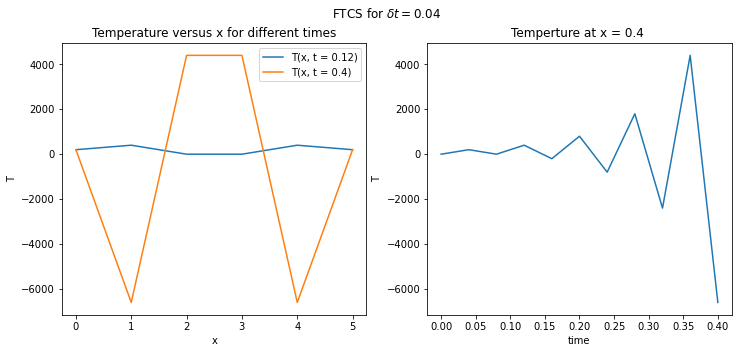

In [103]:
from numpy import empty
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (12, 5))

# Constants
L = 1      # Thickness of steel in meters
D = 1   # Thermal diffusivity -- the diffusion coefficient (m^2/s)
N = 5     # Number of divisions in grid
a = L/N       # Grid spacing
h = 0.04      # Time-step  in seconds (needs to be such that h < a^2/2D for a stable solution, as found in class)
epsilon = h/1000  #just something small for singling out specific times

Tlo =  200.0    # Low temperature in Celcius
Tmid = 0.0  # Intermediate temperature in Celcius
Thi = 200.0   # Hi temperature in Celcius


t2 = 0.12

t5 = 0.4
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Tlo
T[N] = Thi
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

x04 = []
# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:
    

    # Calculate the new values of T using our FTCS method for the diffusion equation
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    
    T,Tp = Tp,T  #copies previous step into next step (and next step into previous step, but this doesn't matter)
    t += h
    x04.append(T[2])

    # # Make plots at the given times
    # if abs(t-t1)<epsilon:
    #     plot(T)
    if abs(t-t2)<epsilon:
        ax1.plot(T, label = "T(x, t = 0.12)")
    # if abs(t-t3)<epsilon:
    #     plot(T)
    # if abs(t-t4)<epsilon:
    #     plot(T)
    if abs(t-t5)<epsilon:
        ax1.plot(T, label = "T(x, t = 0.4)")

fig.suptitle("FTCS for $\delta t  = 0.04$")
ax2.plot(np.arange(0,t,h), x04)
ax2.set_title("Temperture at x = 0.4 ")
ax2.set_xlabel("time")
ax2.set_ylabel("T")

ax1.legend()
ax1.set_title("Temperature versus x for different times")
ax1.set_xlabel("x")
ax1.set_ylabel("T")

Text(0, 0.5, 'T')

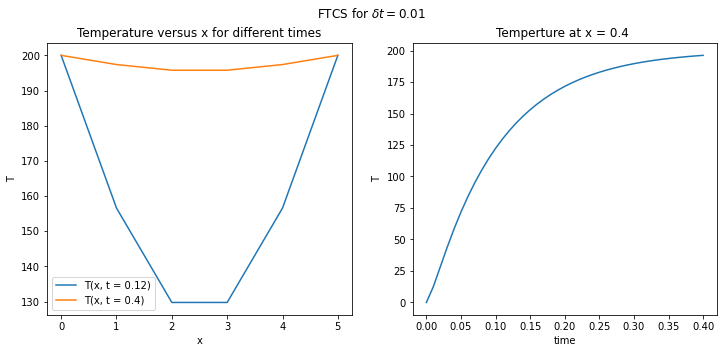

In [105]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (12, 5))

# Do the same except adjust the timestep this time. 
h = 0.01

# Re-Create arrays
T = empty(N+1,float)
T[0] = Tlo
T[N] = Thi
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Array to store the temperature at x = 0.4
x04 = []

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:
    
    # Calculate the new values of T using our FTCS method for the diffusion equation
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    
    T,Tp = Tp,T  #copies previous step into next step (and next step into previous step, but this doesn't matter)
    t += h
    x04.append(T[3])

    # # Make plots at the given times
    # if abs(t-t1)<epsilon:
    #     plot(T)
    if abs(t-t2)<epsilon:
        ax1.plot(T, label = "T(x, t = 0.12)")
    # if abs(t-t3)<epsilon:
    #     plot(T)
    # if abs(t-t4)<epsilon:
    #     plot(T)
    if abs(t-t5)<epsilon:
        ax1.plot(T, label = "T(x, t = 0.4)")

fig.suptitle("FTCS for $\delta t  = 0.01$")
ax2.plot(np.arange(0,0.41,h), x04)
ax2.set_title("Temperture at x = 0.4 ")
ax2.set_xlabel("time")
ax2.set_ylabel("T")

ax1.legend()
ax1.set_title("Temperature versus x for different times")
ax1.set_xlabel("x")
ax1.set_ylabel("T")


Consider that the stability criteria for FTCS is $\Delta t < \Delta x^2/(2D)$ we can see that for the first method, we have $\Delta t  = 0.04$ and $\Delta x = 0.2$ so $\Delta x ^2 / 2 = 0.02$ therfore the stability condition is not met. By decreasing the $\Delta t$ to 0.01, the condition is met. The fact that the stibility codition is not met in for the first case is evident in the plot by the fact that the temperature doens't converge towards 200 for all points x, and that at x= 0.4 the temperature swings far above and below for 0<t<0.4